In [1]:
%matplotlib inline
import os
import pandas as pd
import rasterio
import numpy as np
from rasterstats import zonal_stats

In [2]:
Valdecanas = pd.read_excel(r'E:\VDCNS\Efluentes\excel\Valdecanas.xlsx')

In [3]:
Valdecanas.head()

,dates,max,mean,median,min,per10,per90
2000-02-18,2000-02-18,1385,153.176292,-61,-206,-124.0,591.0
2000-03-05,2000-03-05,1695,108.416413,14,-65,-22.0,287.6
2000-03-21,2000-03-21,2060,30.155015,-56,-152,-95.0,199.2
2000-04-06,2000-04-06,2807,395.993921,2,-425,-238.2,1527.8
2000-04-22,2000-04-22,3506,424.860182,250,-126,64.6,1210.6


In [7]:
Valdecanas.describe()

,max,mean,median,min,per10,per90
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,2617.480978,304.799524,184.638587,-210.760870,-56.428804,790.549457
std,1807.778662,652.908331,617.174980,187.965973,286.636942,1198.351068
min,419.000000,-194.066869,-305.000000,-1521.000000,-433.600000,-125.600000
25%,1439.750000,2.025836,-76.500000,-289.250000,-179.050000,151.150000
50%,1941.500000,67.442249,-16.500000,-201.000000,-111.500000,283.000000
75%,3073.000000,230.799392,122.000000,-128.500000,-32.850000,882.550000
max,9734.000000,4473.510638,4273.000000,926.000000,2333.000000,6988.000000


In [16]:
df1 = Valdecanas['2000':'2006'].describe()

In [17]:
df2 = Valdecanas['2007':'2016'].describe()

In [20]:
df3 = df2 - df1

In [23]:
df3

,max,mean,median,min,per10,per90
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,877.410428,314.056079,275.943400,106.149729,133.449898,552.512562
std,945.626154,496.979505,437.352701,-12.650099,175.149263,892.815895
min,-316.000000,61.066869,48.000000,483.000000,26.600000,46.200000
25%,229.500000,53.439970,58.500000,112.250000,79.650000,10.950000
50%,455.000000,57.550152,52.000000,67.000000,61.300000,59.100000
75%,1031.750000,357.519757,207.500000,72.500000,91.650000,800.500000
max,1453.000000,2675.024316,2009.000000,572.000000,1518.400000,3802.600000


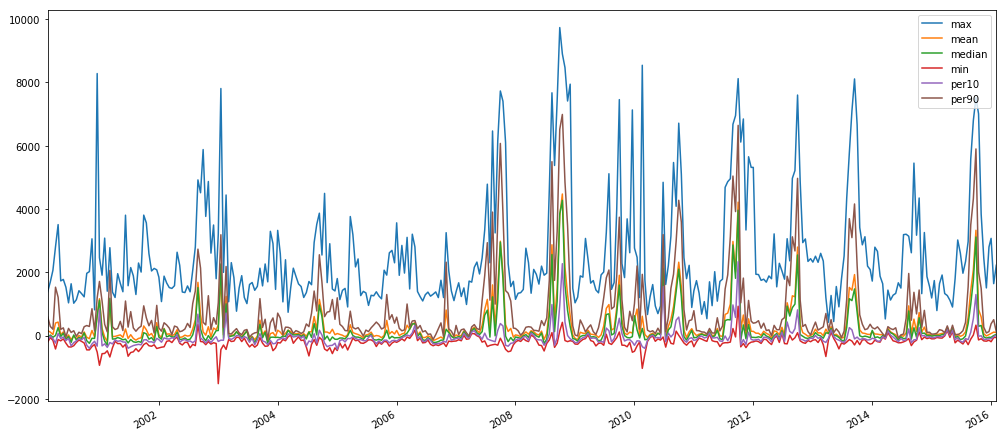

In [6]:
Valdecanas.plot(figsize = (17, 8));

PERCENTIL 90
El número de picos y su valor medio ANTES  de 2007 es de:
9 2185.66666667
El número de picos y su valor medio DESPUÉS a 2007 es de:
23 3685.97391304


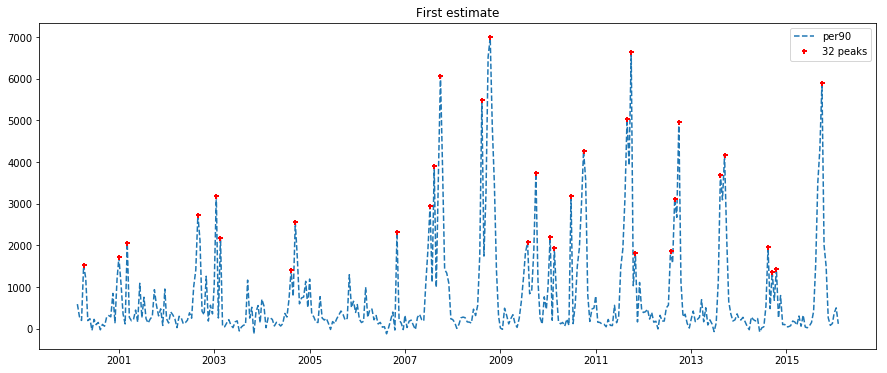

In [15]:
import numpy
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot

import pandas as pd
from pandas.tslib import Timestamp
from IPython.core.display import HTML

   
indexes = peakutils.indexes(Valdecanas['per90'], thres=0.20, min_dist=0)
#print(indexes)
picos = Valdecanas['dates'][indexes], Valdecanas['per90'][indexes]

d = {}

dates = [e for e in picos[0]]
values = [e for e in picos[1]]
for i in range(len(dates)):
    d[dates[i]] = values[i]
#for k, v in sorted(d.items()):
    #print(k, v)
    
d2007 = {}
d2016 = {}

for k, v in d.items():
    if k < Timestamp(2007, 1, 1):
        d2007[k] = v
        
for k, v in d.items():
    if k >= Timestamp(2007, 1, 1):
        d2016[k] = v

#display(HTML('<h2><font color=blue>PERCENTIL 90</font></h2>'))
print('PERCENTIL 90')
print('El número de picos y su valor medio ANTES  de 2007 es de:')
print(len(d2007), sum([i for i in d2007.values()])/len([i for i in d2007.values()]))

print('El número de picos y su valor medio DESPUÉS a 2007 es de:')
print(len(d2016), sum([i for i in d2016.values()])/len([i for i in d2016.values()]))

pyplot.figure(figsize=(15,6))
pplot(Valdecanas['dates'], Valdecanas['per90'], indexes)
pyplot.title('First estimate');

# Time Series

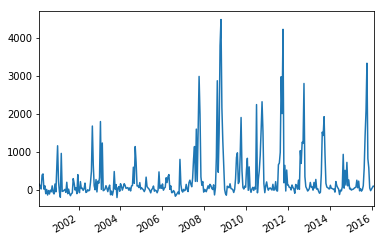

In [25]:
Valdecanas['mean'].plot()

In [32]:
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

In [47]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Data')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.figure(figsize=(20,10))
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


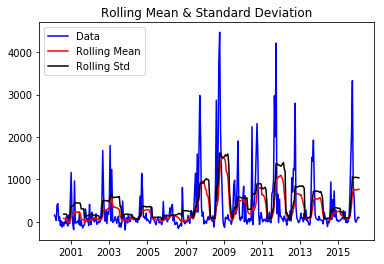

Results of Dickey-Fuller Test:
Test Statistic                -8.132006e+00
p-value                        1.083933e-12
#Lags Used                     2.000000e+00
Number of Observations Used    3.650000e+02
Critical Value (5%)           -2.869491e+00
Critical Value (10%)          -2.571006e+00
Critical Value (1%)           -3.448394e+00
dtype: float64


In [48]:
test_stationarity(Valdecanas['mean'])

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  if __name__ == '__main__':


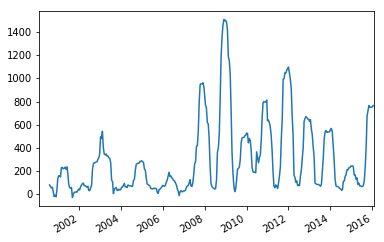

In [36]:
pd.rolling_mean(Valdecanas['mean'], window=12).plot()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


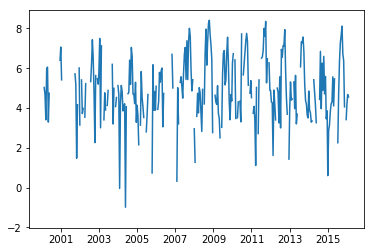

In [52]:
ts_log = np.log(Valdecanas['mean'])
plt.plot(ts_log)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
  if __name__ == '__main__':


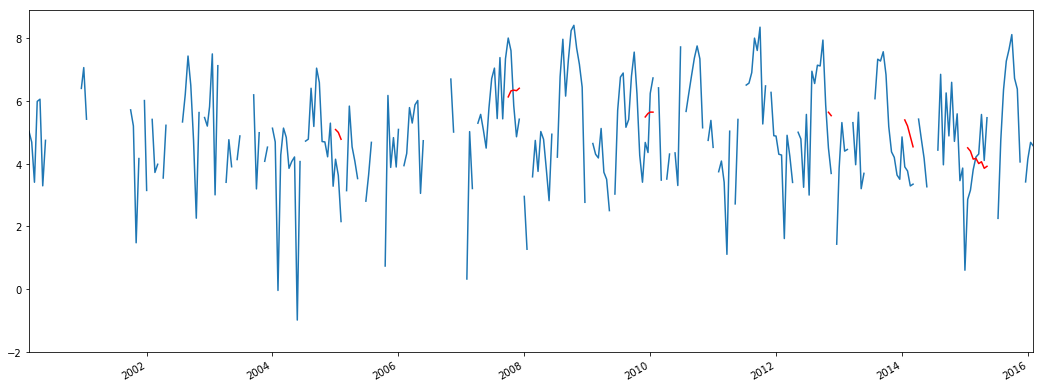

In [62]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
moving_avg.plot(color='red', figsize=(18,7))

In [63]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

2000-02-18   NaN
2000-03-05   NaN
2000-03-21   NaN
2000-04-06   NaN
2000-04-22   NaN
2000-05-08   NaN
2000-05-24   NaN
2000-06-09   NaN
2000-06-25   NaN
2000-07-11   NaN
2000-07-27   NaN
2000-08-12   NaN
Name: mean, dtype: float64

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


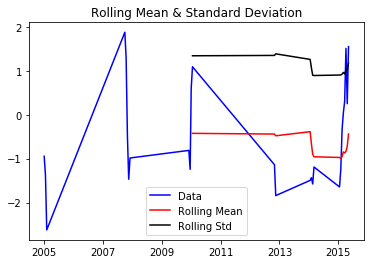

Results of Dickey-Fuller Test:
Test Statistic                 -2.846242
p-value                         0.051966
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
Critical Value (1%)            -3.723863
dtype: float64


In [64]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,halflife=12).mean()
  if __name__ == '__main__':


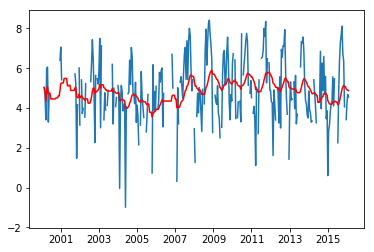

In [65]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


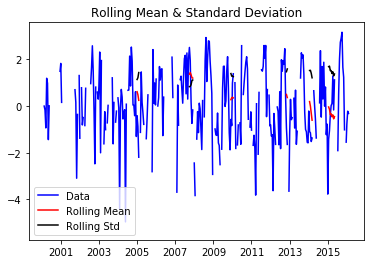

C:\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1546: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


Results of Dickey-Fuller Test:


LinAlgError: SVD did not converge

In [66]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

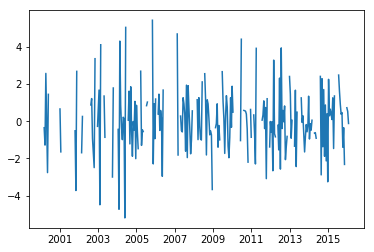

In [67]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


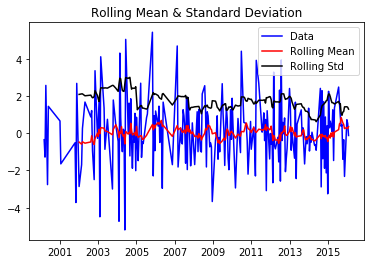

Results of Dickey-Fuller Test:
Test Statistic                -1.101532e+01
p-value                        6.177746e-20
#Lags Used                     2.000000e+00
Number of Observations Used    2.240000e+02
Critical Value (5%)           -2.874531e+00
Critical Value (10%)          -2.573694e+00
Critical Value (1%)           -3.459885e+00
dtype: float64


In [68]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [71]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [72]:
y = Valdecanas['mean'].resample('MS').mean()

In [74]:
y.isnull().sum()

0

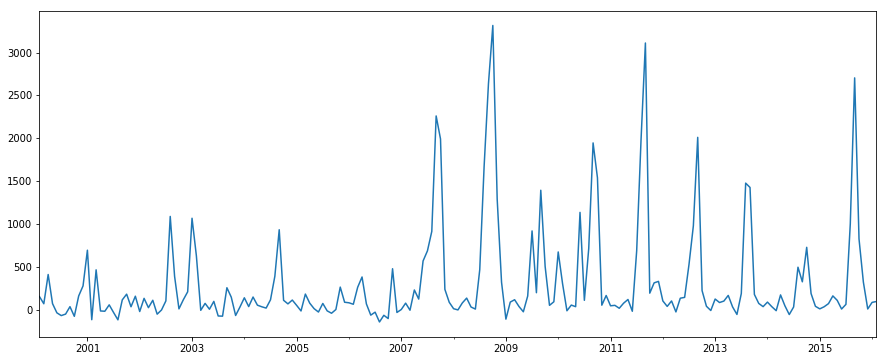

In [75]:
y.plot(figsize=(15, 6))
plt.show()

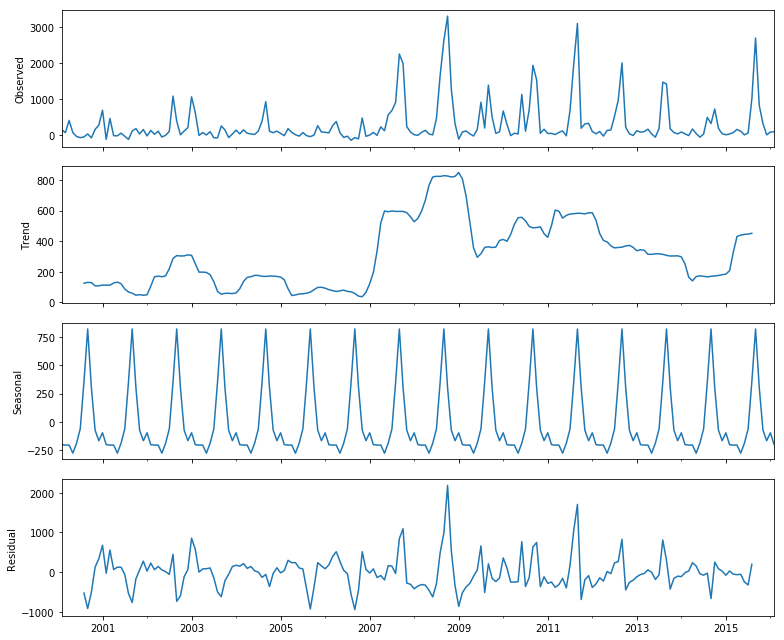

In [76]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()